In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load titanic data and inspect first 20 rows
titanic = pd.read_csv('Titanic.csv')
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Handling missing data

In [68]:
# Check for any missing data in all columns
missing_values_count = titanic.isnull().sum()
print(missing_values_count[0:11])

# Get total number of rows (passengers) to get an idea of how much data is missing
total_passengers = titanic.count()
print('The total number of passengers was '+ str(total_passengers[0]))

# it looks like Age and Cabin are missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64
The total number of passengers was 891


In [69]:
# Check if data is missing evenly across class - passengers in lower classes could have less data recorded

# Get total number of passengers in each class
print(titanic.groupby(['Pclass'])['PassengerId'].count())

# Check missing Age and Cabin by passanger Class
print('Missing Age by Class:')
print(titanic['Age'].isnull().groupby(titanic['Pclass']).sum().to_dict())
print('Missing Cabin by Class:')
print(titanic['Cabin'].isnull().groupby(titanic['Pclass']).sum().to_dict())

# It looks like relatively more passengers in 3rd class are missing age data. 
# Also almost all 2nd and 3rd class passengers don't have assigned cabin
# The fact that age is missing disproportionally between classes could impact analysis
# This data is missing at random (MAR) since can be explained by class 

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Missing Age by Class:
{1: 30, 2: 11, 3: 136}
Missing Cabin by Class:
{1: 40, 2: 168, 3: 479}


In [70]:
# Drop Cabin column
titanic = titanic.drop('Cabin', axis = 1)

# Fill in missing values for Age
titanic = titanic.fillna('Other')

# Inspect
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,Other,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
Analyse impact of Class on Survival

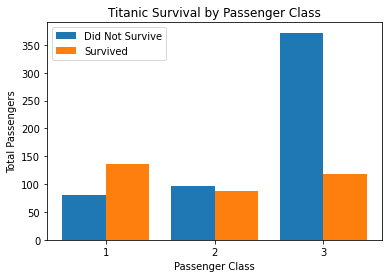

In [71]:
# Get the count of all passengers grouped by class and survival 
survivers_by_class = titanic.groupby(['Pclass','Survived'])['PassengerId'].count().reset_index()

# Get the unique classes for chart X axis
p_class = survivers_by_class['Pclass'].unique()

# Get passengers that survived for Y axis
not_survived_only = survivers_by_class[survivers_by_class['Survived']==0]

# Get passengers that did not survive for Y axis
survived_only = survivers_by_class[survivers_by_class['Survived']==1]

# Set width
width = 0.40

# Plot both sets of data against X axis
plt.bar(p_class-0.2, not_survived_only['PassengerId'], width, label = 'Did Not Survive')
plt.bar(p_class+0.2, survived_only['PassengerId'], width, label = 'Survived')

# Set labels, ticks, title and legeng
plt.xticks(p_class, [1,2,3])
plt.ylabel('Total Passengers')
plt.xlabel('Passenger Class')
plt.title('Titanic Survival by Passenger Class')
plt.legend()

# Display graph
plt.show()

# It is clear that the lower the class, the lower the chance of survival 

In [72]:
# Calculate probability of survaving based on class
print(survivers_by_class)
prob_1st_class = 136/(136+80)
prob_2nd_class = 87/(87+97)
prob_3rd_class = 119/(119+372)

# Print probably of surviving for each class
print(prob_1st_class)
print(prob_2nd_class)
print(prob_3rd_class)

# Probability of surviving, as seen on the chart and in probability calsulation
# was much higher for first 1st class passengers (63%) and lowest for 3rd class passengers(24%)

   Pclass  Survived  PassengerId
0       1         0           80
1       1         1          136
2       2         0           97
3       2         1           87
4       3         0          372
5       3         1          119
0.6296296296296297
0.47282608695652173
0.24236252545824846


Analyse impact of Age on Survival

In [73]:
# Get age and survival data
titanic_age = titanic[['Age','Survived']]

# Remove the missing Age rows
titanic_age = titanic_age[titanic_age['Age'] != 'Other']

# Cast Age as float
titanic_age = titanic_age.astype(float)

# Get mean age based on survival status and display results
survivers_mean_age = titanic_age.groupby(['Survived'])['Age'].mean().reset_index()
print(survivers_mean_age)

# There is very little difference in the mean, 
# however, children group was much smaller than adults overall which would result in smaller difference in the mean

   Survived        Age
0       0.0  30.626179
1       1.0  28.343690


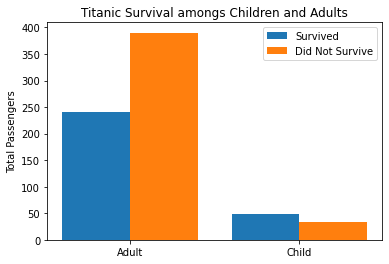

In [74]:
# Create a new column to categorise passengers either as children or not
titanic_age['is_child'] = np.where(titanic_age['Age'] <= 15, True, False)

# Get survived only data
titanic_age_survived = titanic_age[titanic_age['Survived'] == 1]

# Get count of passengers that survived by is_child status
titanic_age_survived = titanic_age_survived.groupby(['is_child'])['Survived'].count().reset_index()

# Get not survived only data
titanic_age_not_survived = titanic_age[titanic_age['Survived'] == 0]

#Get count of passengers that did not survived by is_child status
titanic_age_not_survived = titanic_age_not_survived.groupby(['is_child'])['Survived'].count().reset_index()

# Get child status data for X axis
child_status = titanic_age_survived['is_child'].unique()

# Plot both sets of data against X axis
plt.bar(child_status-0.2, titanic_age_survived['Survived'], width, label='Survived')
plt.bar(child_status+0.2, titanic_age_not_survived['Survived'], width, label ='Did Not Survive')

# Set ticks, labels, title and legend
plt.xticks(child_status, ['Adult','Child'])
plt.ylabel('Total Passengers')
plt.title('Titanic Survival amongs Children and Adults')
plt.legend()
plt.show()

# The group of children was way smaller than adults, 
# however, majority of children survived, whilst, majority of adults did not
# Therefore, it did seem children had an advantage

In [75]:
# Calculate probability of survaving for children and adults
print(titanic_age_survived)
print(titanic_age_not_survived)

prob_adult = 241/(241+390)
prob_child = 49/(49+34)

# Print probability of survaving for children and adults
print(prob_adult)
print(prob_child)

# Children had a higher probability of survaving, 
# however, the difference for adults and children was not as large as the differece between class

   is_child  Survived
0     False       241
1      True        49
   is_child  Survived
0     False       390
1      True        34
0.38193343898573695
0.5903614457831325


Analysing impact of Sex on Survival

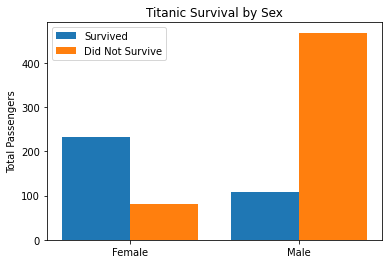

In [76]:
# Get data on Sex and Survival
titanic_sex = titanic[['Sex','Survived']]

# Get count of passengers grouped by Sex and Survival 
titanic_sex = titanic_sex.groupby(['Sex','Survived']).size().reset_index(name='counts')

# Get datasets for passegers that survived and those who did not
titanic_sex_survived = titanic_sex[titanic_sex['Survived']==1].reset_index()
titanic_sex_not_survived = titanic_sex[titanic_sex['Survived']==0].reset_index()

# Get data for X axis
x = np.arange(2)

# Plot both sets of data against X axis
plt.bar(x-0.2, titanic_sex_survived['counts'], width, label = 'Survived')
plt.bar(x+0.2, titanic_sex_not_survived['counts'], width, label = 'Did Not Survive')

# Set ticks, legend, labels and title
plt.legend()
plt.xticks(x, ['Female', 'Male'])
plt.title('Titanic Survival by Sex')
plt.ylabel('Total Passengers')

# Display results
plt.show()

# It is clear that women had a great advantage and much better chance at survival

In [77]:
# Calculate probability of survaving based on Sex
print(titanic_sex)

prob_female = 233/(233+81)
prob_male = 109/(109+468)

# Print probability of survaving based on Sex
print(prob_female)
print(prob_male)

# Women had a way higher probability of survival (74%) than men (19%)
# This difference in probability is the highest among the investigated variables
# Therefore, Sex had the highest impact on survival

      Sex  Survived  counts
0  female         0      81
1  female         1     233
2    male         0     468
3    male         1     109
0.7420382165605095
0.18890814558058924


For additional insight, analyse impact of having Siblings/Spouse on board.
Potentially, having someone could be beneficial for getting additional help, or could be hindering, because of the need to look after one another.

In [78]:
# Create new column to determine if the passenger had siblings/spouse (SibSp) on board
titanic['has_sibsp'] = np.where(titanic['SibSp'] > 0, True, False)

# Get data on having SibSp and survival
titanic_sibsp = titanic[['has_sibsp', 'Survived']].reset_index()

# Get passengers grouped by having SibSp and survival
titanic_sibsp = titanic_sibsp.groupby(['has_sibsp', 'Survived']).size().reset_index(name='counts')

# Calculate probability of survival based on having SibSp
print(titanic_sibsp)

prob_has_sibsp = 132/(132+151)
prob_no_sibsp = 210/(210+398)

# Display results
print(prob_has_sibsp)
print(prob_no_sibsp)

# Having siblings or spouse on board seemed to have been mildly beneficial 

   has_sibsp  Survived  counts
0      False         0     398
1      False         1     210
2       True         0     151
3       True         1     132
0.4664310954063604
0.34539473684210525
